Exploratory Data Analysis (EDA)

In [36]:
import pandas as pd
df = pd.read_csv("/content/Fertilizer Prediction.csv")


In [23]:
print(df.head())


   Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0           32        51        41       Red  Ground Nuts         7   
1           35        58        35     Black       Cotton         4   
2           27        55        43     Sandy    Sugarcane        28   
3           33        56        56     Loamy  Ground Nuts        37   
4           32        70        60       Red  Ground Nuts         4   

   Potassium  Phosphorous Fertilizer Name  
0          3           19        14-35-14  
1         14           16            Urea  
2          0           17           20-20  
3          5           24           28-28  
4          6            9        14-35-14  


In [24]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      100000 non-null  int64 
 1   Humidity         100000 non-null  int64 
 2   Moisture         100000 non-null  int64 
 3   Soil Type        100000 non-null  object
 4   Crop Type        100000 non-null  object
 5   Nitrogen         100000 non-null  int64 
 6   Potassium        100000 non-null  int64 
 7   Phosphorous      100000 non-null  int64 
 8   Fertilizer Name  100000 non-null  object
dtypes: int64(6), object(3)
memory usage: 6.9+ MB
None
         Temparature       Humidity      Moisture       Nitrogen  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean       31.503300      60.985810      45.00344      22.986770   
std         4.019942       6.651393      11.83871      11.247289   
min        25.000000      50.000000      25.00000       4.

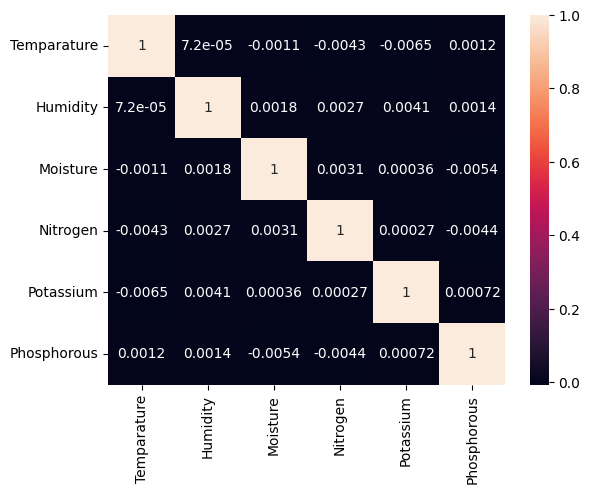

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


Data Transformation

In [26]:
df = df.dropna()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Soil Type'] = le.fit_transform(df['Soil Type'])
df['Crop Type'] = le.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))


Feature Selection

In [30]:
print(df.columns)


Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [31]:
print(df.columns.tolist())


['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type', 'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_encoded = df.copy()

# Ensure target column is categorical (string)
df_encoded['Fertilizer Name'] = df_encoded['Fertilizer Name'].astype(str)

# Encode all other object (string) columns except target
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Fertilizer Name':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split features and target
X = df_encoded.drop('Fertilizer Name', axis=1)
y = df_encoded['Fertilizer Name']

# Train model
model = RandomForestClassifier()
model.fit(X, y)


RandomForestClassifier()